<a href="https://colab.research.google.com/github/nkrish04/Image_Classification/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import PIL

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# WE USED SPLIT-FOLDER LIBRARY TO SPILT THE DATASET INTO TRAINIG SET, VALIDATION SET AND TEST SET. WE USED

# splitfolders.ratio('PlantVillage', output="output", seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False)

In [3]:
image_size = (256, 256)
img_height = 256
img_width = 256

In [4]:
train = keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/ml/output/train',
    labels='inferred',
    label_mode='int',
    shuffle=True,
    image_size = (256,256),
)

val = keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/ml/output/val',
    labels='inferred',
    label_mode='int',
    shuffle=True,
    image_size = (256,256),
)

test = keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/ml/output/test',
    label_mode='int',
    shuffle=True,
    image_size = (256,256),
)


Found 14437 files belonging to 15 classes.
Found 4121 files belonging to 15 classes.
Found 2075 files belonging to 15 classes.


In [ ]:
class_names = train.class_names

plt.figure(figsize=(30, 30))
for images, labels in train.take(1):
    for i in range(15):
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



In [ ]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.5),
    layers.RandomZoom(-0.2,0.2),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(
    1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = len(class_names)
input_shape = (32,img_height,img_width,3)

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=15,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

In [12]:
resnet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24644495 (94.01 MB)
Trainable params: 1056783 (4.03 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [15]:
epochs=10
history = resnet_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/10
452/452 [==============================] - 459s 1s/step - loss: 0.0670 - accuracy: 0.9771 - val_loss: 0.1614 - val_accuracy: 0.9490
Epoch 2/10
452/452 [==============================] - 456s 1s/step - loss: 0.0482 - accuracy: 0.9823 - val_loss: 0.1273 - val_accuracy: 0.9597
Epoch 3/10
452/452 [==============================] - 457s 1s/step - loss: 0.0552 - accuracy: 0.9810 - val_loss: 0.1659 - val_accuracy: 0.9546
Epoch 4/10
452/452 [==============================] - 455s 1s/step - loss: 0.0499 - accuracy: 0.9837 - val_loss: 0.1143 - val_accuracy: 0.9634
Epoch 5/10
452/452 [==============================] - 457s 1s/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.1471 - val_accuracy: 0.9585
Epoch 6/10
452/452 [==============================] - 459s 1s/step - loss: 0.0481 - accuracy: 0.9824 - val_loss: 0.1499 - val_accuracy: 0.9590
Epoch 7/10
452/452 [==============================] - 463s 1s/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 0.1236 - val_accuracy: 0.9624

In [ ]:
# num_classes = len(class_names)
# input_shape = (32,img_height,img_width,3)

# model = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding="same", activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding="same", activation='relu'),
#   layers.Conv2D(32, 3, padding="same", activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding="same", activation='relu'),
#   layers.Conv2D(64, 3, padding="same", activation='relu'),
#   layers.Conv2D(64, 3, padding="same", activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(128, 3, padding="same", activation='relu'),
#   layers.Conv2D(128, 3, padding="same", activation='relu'),
#   layers.Conv2D(128, 3, padding="same", activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(128, 3, padding="same", activation='relu'),
#   layers.Conv2D(128, 3, padding="same", activation='relu'),
#   layers.Conv2D(128, 3, padding="same", activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(256, activation='relu'),
#   layers.Dense(256, activation='relu'),
#   layers.Dense(num_classes, name="outputs")
# ])

# model.build(input_shape=input_shape)

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [ ]:
# model.summary()

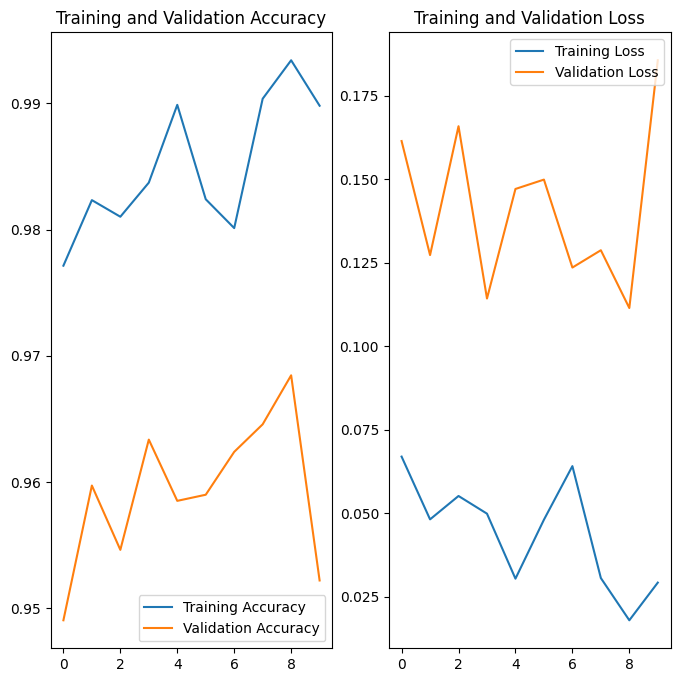

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# from keras.metrics import Precision, Recall, BinaryAccuracy
# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()
# for batch in test.as_numpy_iterator():
#     X, y = batch
#     yhat = resnet_model.predict(X)
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)

# print(pre.result(), re.result(), acc.result())

In [ ]:
# import cv2
# img = cv2.imread('/content/drive/MyDrive/ml/output/test/Potato___healthy/a3ec91aa-8503-4711-a912-0d1427e25686___RS_HL 5409.JPG')
# plt.imshow(img)
# resize = tf.image.resize(img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

# predictions = model.predict(img_array)
# # score = tf.nn.softmax(predictions[0])

# # # score = tf.nn.softmax(predictions[0])

# # print(
# #     "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))
# # )

In [29]:
from keras.models import load_model
resnet_model.save(filepath ='/content/drive/MyDrive/ml/output')
# new_model = load_model('imageclassifier.h5')
# new_model.predict(np.expand_dims(resize/255, 0))

In [33]:
savedModel=load_model('/content/drive/MyDrive/ml')
savedModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24644495 (94.01 MB)
Trainable params: 1056783 (4.03 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [23]:
savedModel.evaluate(test)

65/65 [==============================] - 107s 2s/step - loss: 0.1990 - accuracy: 0.9586


[0.19895625114440918, 0.958554208278656]

AttributeError: module 'keras.api._v2.keras' has no attribute 'ops'

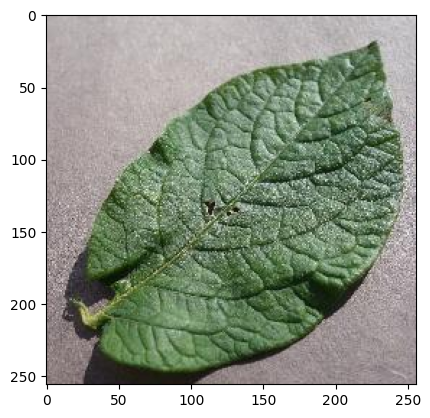

In [19]:
img =keras.utils.load_img("/content/drive/MyDrive/ml/output/test/Potato___healthy/a3ec91aa-8503-4711-a912-0d1427e25686___RS_HL 5409.JPG", target_size=(256,256))
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))
)